# 1. Calculate

In [2]:
import pandas as pd
import numpy as np
import os
import glob
import sys
from rdkit import Chem
sys.path.append('./Codebase/similarity')
from SimilarityCalculation import similarity_calculate
from SimilarityValidation import similarity_validation

In [3]:
data = pd.read_csv('./Data/Similarity/Data_simi.csv', index_col =0)

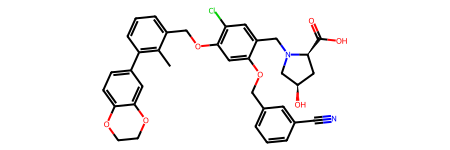

In [4]:
# BMS-1166
base = "O=C(O)[C@@H]1N(CC2=CC(Cl)=C(OCC3=CC=CC(C4=CC=C(OCCO5)C5=C4)=C3C)C=C2OCC6=CC=CC(C#N)=C6)C[C@H](O)C1"
query = Chem.MolFromSmiles(base)
query.SetProp('_Name', 'BMS-1166')
query

,Smiles,pIC50,ROMol,tanimoto_avalon,tanimoto_maccs,tanimoto_ecfp4,tanimoto_rdk5,tanimoto_map4,dice_avalon,dice_maccs,dice_ecfp4,dice_rdk5,dice_map4
0,FC(F)Oc1c(CNC[C@@H](O)CC(=O)O)ccc(-c2c(C)c(-c3...,1,<rdkit.Chem.rdchem.Mol object at 0x000001BD8AF...,0.339506,0.607143,0.210938,0.370370,0.726434,0.506912,0.755556,0.348387,0.540541,0.726434
1,Clc1c(-c2c(Cl)c(-c3cc(/C=C/c4ccc(OC)cc4)c(CNCC...,1,<rdkit.Chem.rdchem.Mol object at 0x000001BD8B0...,0.369176,0.632911,0.161538,0.387500,0.755826,0.539267,0.775194,0.278146,0.558559,0.755826
2,Clc1c(-c2c(Cl)c(-c3cc(CCc4ccccc4)c(CNC[C@H]4NC...,1,<rdkit.Chem.rdchem.Mol object at 0x000001BD8B0...,0.377289,0.623377,0.195122,0.373041,0.726348,0.547872,0.768000,0.326531,0.543379,0.726348
3,Clc1c(-c2c(O)c(-c3nc(OC)c(CNC[C@H]4NC(=O)CC4)c...,1,<rdkit.Chem.rdchem.Mol object at 0x000001BD8B0...,0.370107,0.653846,0.151261,0.353218,0.652577,0.540260,0.790698,0.262774,0.522042,0.652577
4,Clc1c(-c2c(Cl)c(-c3nc(OC)c(CNC[C@H]4NC(=O)CC4)...,1,<rdkit.Chem.rdchem.Mol object at 0x000001BD8B0...,0.362637,0.620253,0.159664,0.366883,0.649123,0.532258,0.765625,0.275362,0.536817,0.649123


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


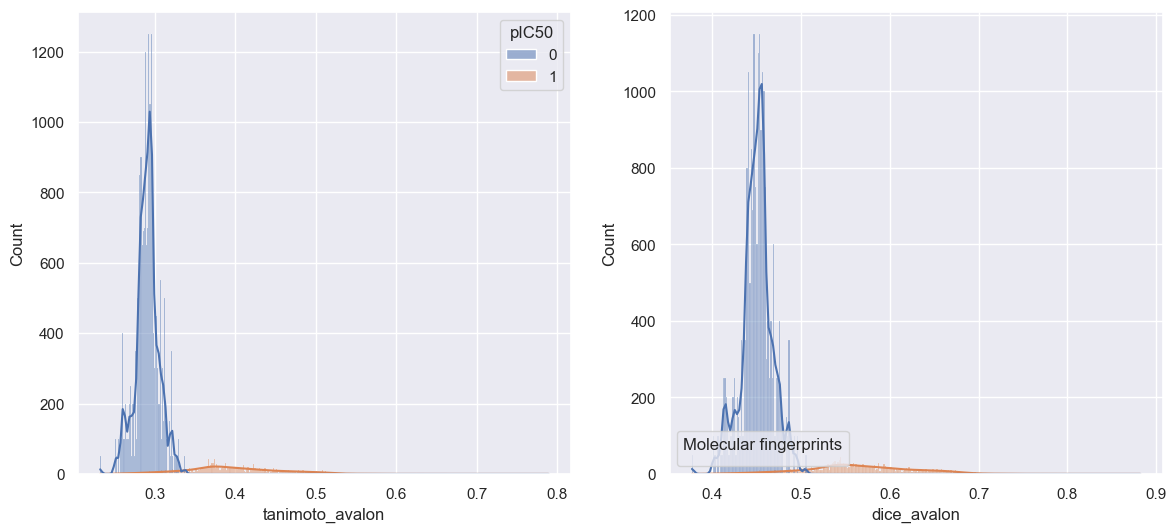

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


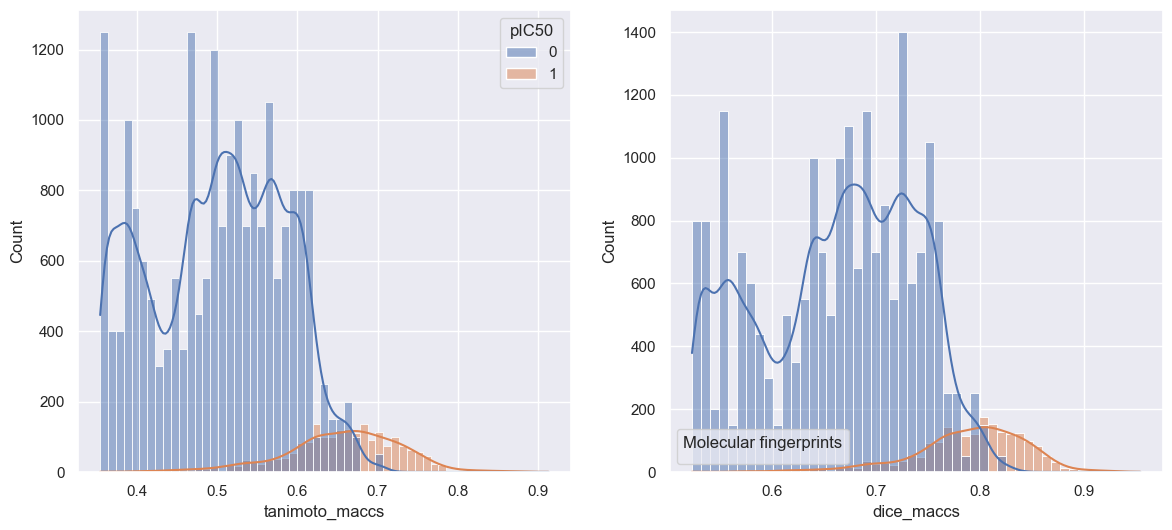

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


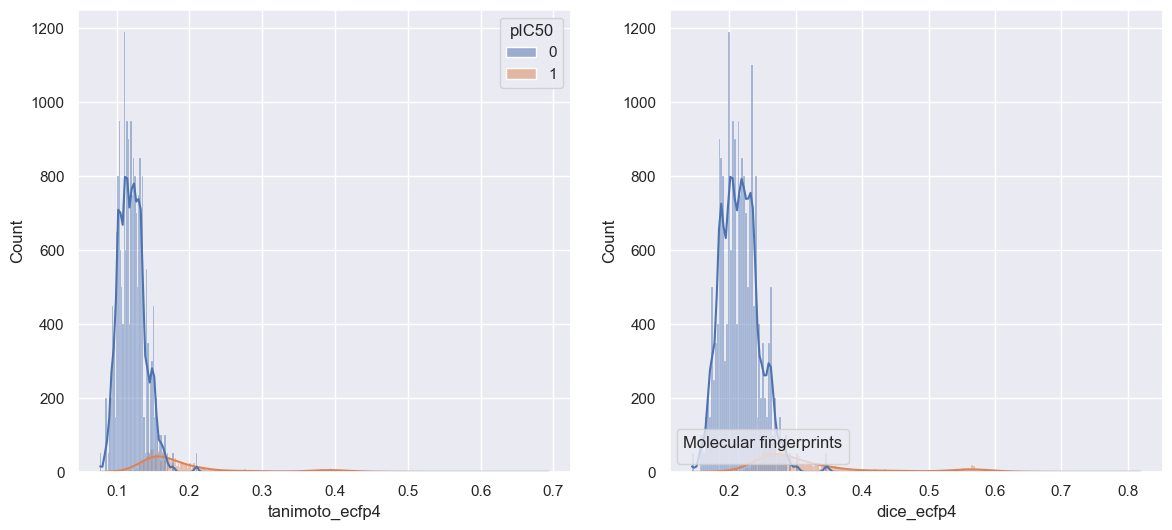

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


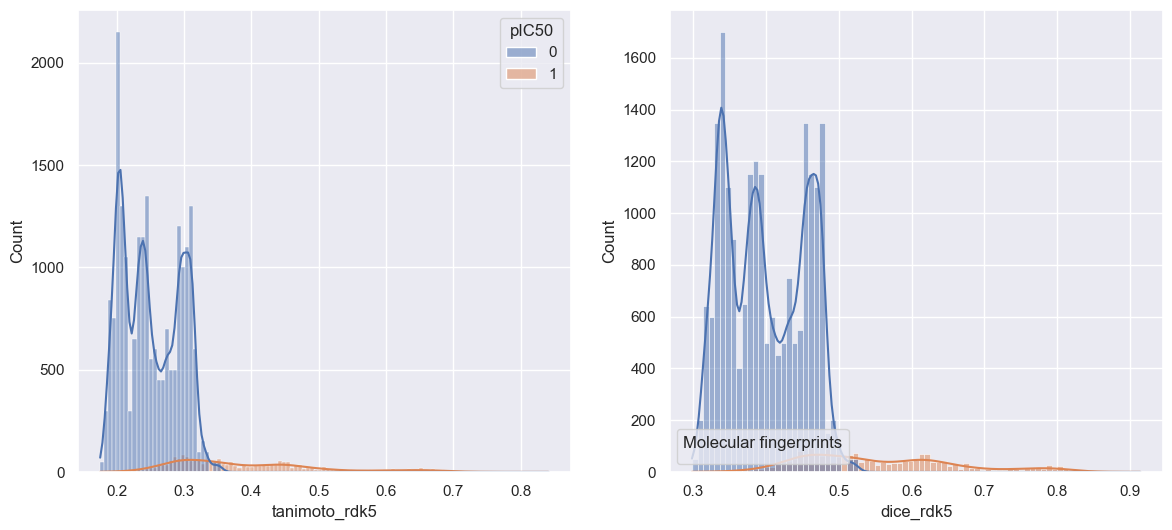

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


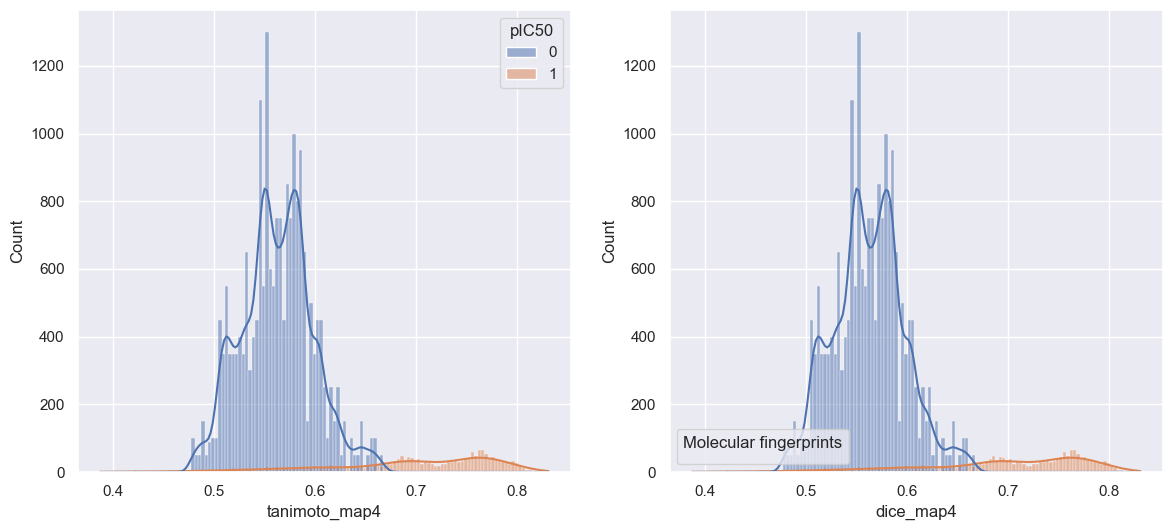

In [6]:
similarity = similarity_calculate(data = data, query= query, smile_col="Smiles", active_col='pIC50', save_dir ='./Data/Similarity')
similarity.fit()
similarity.plot()

In [7]:
similarity.data.shape

(22484, 13)

# 2. Internal validation

In [8]:
# load data from data dir
#path = './Data/Similarity/Raw_data'
#df_valid = pd.read_csv(path+f'/simi_{query.GetProp("_Name")}.csv', index_col=0)

# use the data above
df_valid = similarity.data
df_valid.shape

(22484, 13)

,Model,AP,AUCROC,logAUCROC,EF1%,EF5%,EF10%
0,tanimoto_avalon,0.933,0.963,0.913,10.959,10.998,9.041
1,tanimoto_maccs,0.721,0.923,0.64,10.959,9.53,6.756
2,tanimoto_ecfp4,0.75,0.948,0.658,10.959,9.53,7.04
3,tanimoto_rdk5,0.759,0.914,0.712,10.959,10.558,7.035
4,tanimoto_map4,0.829,0.9,0.794,10.959,10.998,7.818


<Figure size 1400x1000 with 0 Axes>

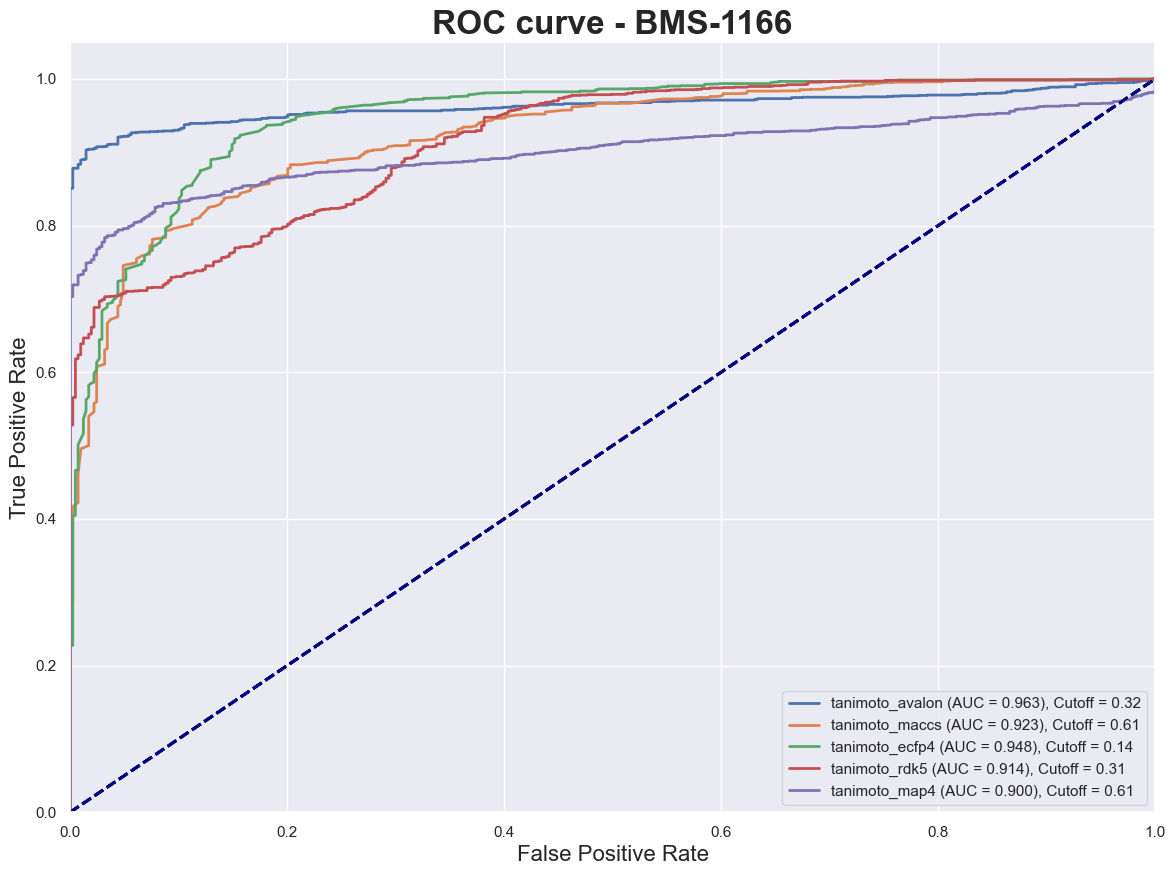

In [9]:
valid = similarity_validation(df_valid, active_col = 'pIC50', scores = 'tanimoto',plot_type = 'roc', 
                              figsize = (14,10), query =query, save_dir ='./Data/Similarity')
valid.validation()
valid.visualize()
display(valid.table)

,Model,AP,AUCROC,logAUCROC,EF1%,EF5%,EF10%
0,tanimoto_avalon,0.933,0.963,0.913,10.959,10.998,9.041
1,tanimoto_maccs,0.721,0.923,0.64,10.959,9.53,6.756
2,tanimoto_ecfp4,0.75,0.948,0.658,10.959,9.53,7.04
3,tanimoto_rdk5,0.759,0.914,0.712,10.959,10.558,7.035
4,tanimoto_map4,0.829,0.9,0.794,10.959,10.998,7.818


<Figure size 1400x1000 with 0 Axes>

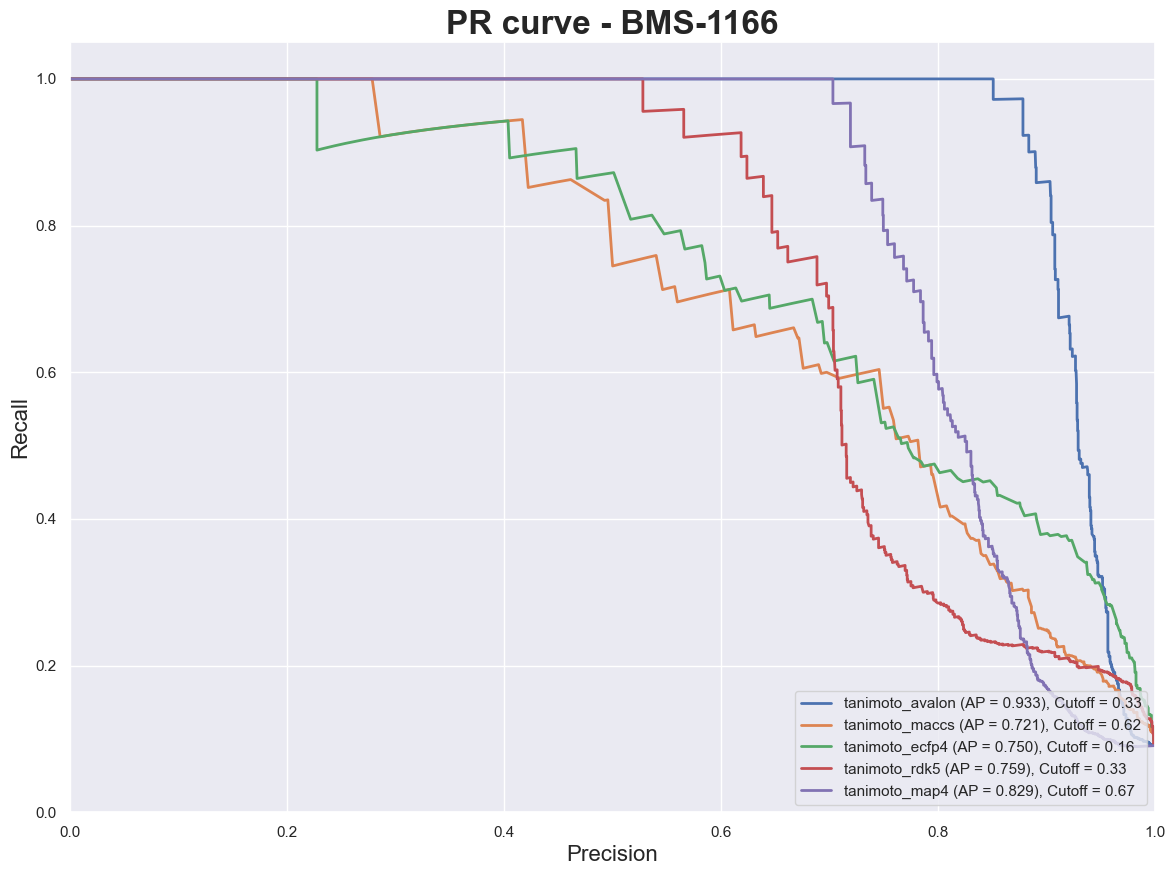

In [10]:
valid = similarity_validation(df_valid, active_col = 'pIC50', scores = 'tanimoto',plot_type = 'pr', 
                              figsize = (14,10), query =query, save_dir ='./Data/Similarity')
valid.validation()
valid.visualize()
display(valid.table)